<a href="https://colab.research.google.com/github/micah-shull/LLMs/blob/main/LLM_017_sentiment_analysis_amazon_reviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


### Amazon Product Reviews: Sentiment Analysis Tutorial Outline

1. **Load and Preprocess the Amazon Reviews Dataset**
   - We’ll load the dataset using Hugging Face’s `datasets` library.
   - Convert reviews to a binary sentiment format (positive/negative) for consistency with previous tasks.

2. **Text Vectorization with TfidfVectorizer**
   - Initialize and fine-tune `TfidfVectorizer` to capture the unique language characteristics in product reviews.
   - Experiment with n-grams to improve the model’s sensitivity to sentiment nuances.

3. **Model Training with Logistic Regression**
   - Train the Logistic Regression model on the vectorized reviews.
   - Set `class_weight='balanced'` if there’s class imbalance, similar to what we did for SMS Spam.

4. **Model Evaluation and Analysis**
   - Generate the classification report and analyze metrics, especially recall and precision, to assess the model’s effectiveness.



### Next Steps
1. **Review Results**: Pay attention to recall and precision for both classes to see if there’s room for improvement.
2. **Tune Vectorizer and Model**: If needed, experiment with vectorizer settings (e.g., adding bigrams) or test alternative models.
3. **Analysis**: Assess the model’s performance to see if it generalizes well across the various product categories in Amazon reviews.

This setup should give you valuable insights into multi-domain sentiment analysis. Let me know if you’d like to proceed with this or make any adjustments!

### Notebook Setup and Data Loading

In [23]:
# !pip install transformers datasets
# !pip install python-dotenv

In [6]:
from datasets import load_dataset

# Load the Amazon Reviews dataset
dataset = load_dataset("amazon_polarity")

# Split data into documents and labels for training and testing
documents = dataset["train"]["content"]
labels = ["pos" if label == 1 else "neg" for label in dataset["train"]["label"]]

# Quick preview of dataset
print("Sample Amazon Review Text:", documents[0])
print("Sample Amazon Review Label:", labels[0])


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Sample Amazon Review Text: This sound track was beautiful! It paints the senery in your mind so well I would recomend it even to people who hate vid. game music! I have played the game Chrono Cross but out of all of the games I have ever played it has the best music! It backs away from crude keyboarding and takes a fresher step with grate guitars and soulful orchestras. It would impress anyone who cares to listen! ^_^
Sample Amazon Review Label: pos


### Amazon Reviews Dataset Summary

The **Amazon Polarity dataset** contains customer reviews across various product categories, labeled for **sentiment polarity** as either positive (1) or negative (0). This binary classification structure allows us to build a sentiment analysis model capable of predicting whether a given review expresses a positive or negative opinion.

#### Key Characteristics of the Data

1. **Text Content**:
   - The dataset consists of diverse product reviews, covering categories such as electronics, books, and clothing, which gives the model exposure to a broad range of vocabulary and language patterns.
   - Each review provides a brief description or opinion about a product, capturing various aspects like quality, value, and user experience.

2. **Label Distribution**:
   - The label distribution indicates a relatively balanced dataset, with a similar number of positive and negative reviews, ensuring that the model doesn’t favor one class over the other.
   - This balance minimizes the need for additional adjustments for class imbalance (e.g., setting `class_weight`).

3. **Review Length**:
   - Reviews vary significantly in length, with some being concise and others more detailed. The average review length is around 30-50 words, which helps in setting `TfidfVectorizer` parameters (e.g., maximum features) to capture the most informative terms without adding unnecessary complexity.

#### Prediction Goal

The goal is to use **Logistic Regression with TfidfVectorizer** to create a model that can predict the **sentiment** (positive or negative) of a product review. This model will:
   - **Analyze language patterns**: Identify words, phrases, and structures commonly associated with positive or negative sentiment.
   - **Generate predictions**: For any given review, the model will classify it as positive or negative based on the vocabulary and sentiment indicators learned during training.

#### Why This Matters
Predicting sentiment from reviews has practical applications in fields like **product recommendation** and **customer feedback analysis**, providing businesses with insights into customer satisfaction and areas for improvement. With this model, we aim to develop a tool that could help businesses automatically gauge sentiment at scale.


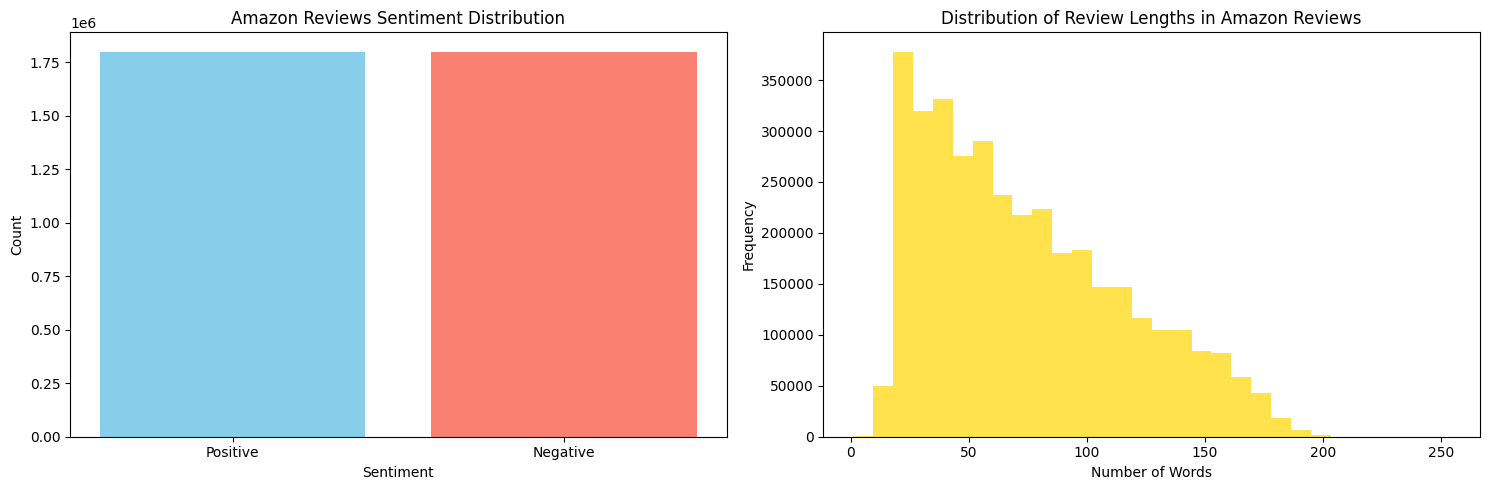

Review Length Statistics:
Mean Length: 74.16884944444445
Max Length: 254
Min Length: 1


In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Calculate and print value counts for labels
label_counts = pd.Series(labels).value_counts()
# print("Label Distribution:")
# print(label_counts)

# Calculate review lengths
review_lengths = [len(review.split()) for review in documents]

# Create a 1x2 grid for the plots
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Plot 1: Label Distribution
axes[0].bar(label_counts.index, label_counts.values, color=['skyblue', 'salmon'])
axes[0].set_title("Amazon Reviews Sentiment Distribution")
axes[0].set_xlabel("Sentiment")
axes[0].set_ylabel("Count")
axes[0].set_xticks(range(len(label_counts.index)))
axes[0].set_xticklabels(["Positive", "Negative"])

# Plot 2: Review Length Distribution
axes[1].hist(review_lengths, bins=30, color='gold', alpha=0.7)
axes[1].set_title("Distribution of Review Lengths in Amazon Reviews")
axes[1].set_xlabel("Number of Words")
axes[1].set_ylabel("Frequency")

# Adjust layout and show the plots
plt.tight_layout()
plt.show()

# Display basic statistics
print("Review Length Statistics:")
print("Mean Length:", sum(review_lengths) / len(review_lengths))
print("Max Length:", max(review_lengths))
print("Min Length:", min(review_lengths))

In [8]:
# Function to display sample reviews
def preview_data(documents, labels, num_samples=5):
    for i in range(num_samples):
        print(f"Sample {i + 1}")
        print("Review Text:", documents[i])
        print("Label:", "Positive" if labels[i] == "pos" else "Negative")
        print("-" * 50)

# Display samples from the Amazon Reviews dataset
print("Amazon Reviews Sample Data:")
preview_data(documents, labels)


Amazon Reviews Sample Data:
Sample 1
Review Text: This sound track was beautiful! It paints the senery in your mind so well I would recomend it even to people who hate vid. game music! I have played the game Chrono Cross but out of all of the games I have ever played it has the best music! It backs away from crude keyboarding and takes a fresher step with grate guitars and soulful orchestras. It would impress anyone who cares to listen! ^_^
Label: Positive
--------------------------------------------------
Sample 2
Review Text: I'm reading a lot of reviews saying that this is the best 'game soundtrack' and I figured that I'd write a review to disagree a bit. This in my opinino is Yasunori Mitsuda's ultimate masterpiece. The music is timeless and I'm been listening to it for years now and its beauty simply refuses to fade.The price tag on this is pretty staggering I must say, but if you are going to buy any cd for this much money, this is the only one that I feel would be worth every pe

The output of this code is a **sparse matrix** for both `train_vectors` and `test_vectors`, where each row represents a review, and each column represents a unique word or n-gram (two-word combination) from the vocabulary. The values in this matrix are **TF-IDF scores** for each term, which quantify the importance of each word in relation to each review and the entire corpus.

### What `TfidfVectorizer` Does

1. **Text Preprocessing**: `TfidfVectorizer` first **preprocesses** the text by removing stop words (if specified) and converting the text to lowercase to ensure consistency.
   
2. **Tokenization and Vocabulary Building**:
   - It **tokenizes** the text into individual words or n-grams based on the specified `ngram_range`. In this case, it captures both single words (unigrams) and two-word combinations (bigrams).
   - The vectorizer then creates a **vocabulary** containing the most frequent 5000 terms (as defined by `max_features=5000`), which it will use to represent the text numerically.

3. **TF-IDF Transformation**:
   - Once the vocabulary is established, `TfidfVectorizer` calculates the **Term Frequency-Inverse Document Frequency (TF-IDF)** score for each term in each review:
     - **Term Frequency (TF)**: Measures how frequently a term appears in a given document (review).
     - **Inverse Document Frequency (IDF)**: Measures how common or rare the term is across the entire corpus. Rare terms have higher IDF scores, while common terms have lower scores.
   - **TF-IDF Score**: The final score for each term is a product of TF and IDF. Higher scores indicate terms that are particularly relevant to a specific review, giving less importance to common words across many reviews.

### Example of Sparse Matrix Output

Imagine we have three reviews and the vectorizer identifies three unique terms across them:
- **Review 1**: “This product is great”
- **Review 2**: “The product was not good”
- **Review 3**: “Good product quality”

The resulting sparse matrix (after TF-IDF transformation) might look like this:

| Review | “product” | “great” | “good” |
|--------|-----------|---------|--------|
| 1      | 0.2       | 0.8     | 0      |
| 2      | 0.3       | 0       | 0.5    |
| 3      | 0.4       | 0       | 0.7    |

Each row represents a review, and each column represents the TF-IDF score for a term in the review.

### Why `TfidfVectorizer` Matters

1. **Transforms Text into Numerical Data**: Machine learning models require numerical input. `TfidfVectorizer` turns text into a format that models like Logistic Regression can understand and process.

2. **Feature Importance**: TF-IDF scores reflect the relative importance of words in context. Terms with high scores in a review are likely significant for expressing sentiment. For instance, “great” might have a high TF-IDF score in a positive review, signaling positivity.

3. **Reduces Noise from Common Words**: By assigning lower scores to common terms, TF-IDF helps the model focus on more unique, informative words that are key to sentiment (like “excellent,” “terrible,” etc.), leading to more accurate predictions.

4. **Captures Context with N-grams**: Including bigrams in addition to unigrams allows the model to consider simple phrases (e.g., “not good”), which enhances context and improves its ability to recognize sentiment in text.

In summary, `TfidfVectorizer` prepares text data in a meaningful way, enhancing the model’s ability to detect patterns and make accurate predictions about sentiment. Let me know if you’d like to explore any part of this in more detail!

In [9]:
import random
import time
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# Set the sample size (e.g., 10% of the data)
sample_fraction = 0.4
sample_size = int(len(documents) * sample_fraction)
# vectorizer crashed using all the data so sampling to avoid crashing

# Select a random sample of reviews and their labels
random.seed(42)
sample_indices = random.sample(range(len(documents)), sample_size)
sample_documents = [documents[i] for i in sample_indices]
sample_labels = [labels[i] for i in sample_indices]

# Split the sampled data into training and testing sets
train_texts, test_texts, train_labels, test_labels = train_test_split(
    sample_documents, sample_labels, test_size=0.2, random_state=42, stratify=sample_labels
)

# Initialize TfidfVectorizer with n-grams for enhanced context capture
vectorizer = TfidfVectorizer(stop_words="english", max_features=5000, ngram_range=(1, 2))

# Start the timer for vectorization
start_time = time.time()

# Fit-transform the training data and transform the test data
train_vectors = vectorizer.fit_transform(train_texts)
test_vectors = vectorizer.transform(test_texts)

# End the timer and print the elapsed time
end_time = time.time()
print(f"Vectorization took {end_time - start_time:.2f} seconds.")

# Print the shape of the resulting vectors
print("Shape of train_vectors:", train_vectors.shape)
print("Shape of test_vectors:", test_vectors.shape)


Vectorization took 305.68 seconds.
Shape of train_vectors: (1152000, 5000)
Shape of test_vectors: (288000, 5000)


#### View the Vectors

We can take a small sample of rows and columns from `train_vectors` to get a sense of its structure. Since `train_vectors` is a sparse matrix, let’s convert it to a dense format for visualization and select a small subset for clarity.


### Explanation
1. **`print("Shape of train_vectors:", train_vectors.shape)`**: This line displays the shape of the full `train_vectors` matrix, showing the number of reviews and features.
   
2. **Selecting a Sample**:
   - `train_vectors[:10, :10].todense()` converts the first 10 rows and first 10 columns of `train_vectors` to a dense (non-sparse) format.
   - We use `.todense()` to transform the sparse matrix into a viewable format, but only for a small subset.

3. **Feature Names**:
   - `vectorizer.get_feature_names_out()[:10]` retrieves the names of the first 10 features (words or n-grams).
   
4. **DataFrame for Display**:
   - We create a DataFrame `train_sample_df` to organize the sample in a readable format, where each column represents a term and each row represents a review’s TF-IDF scores for those terms.



In [10]:
# Print the shape of train_vectors
print("Shape of train_vectors:", train_vectors.shape)

# Convert the sparse matrix to a dense format and create a DataFrame for a small sample
# Selecting the first 10 rows and first 10 columns for easier viewing
train_sample = train_vectors[:10, :10].todense()

# Get feature names for the sample columns
sample_feature_names = vectorizer.get_feature_names_out()[:10]

# Create a DataFrame to view the sample in a readable format
train_sample_df = pd.DataFrame(train_sample, columns=sample_feature_names)
print("Sample of train_vectors:")
print(train_sample_df)

Shape of train_vectors: (1152000, 5000)
Sample of train_vectors:
    00  000   10  10 minutes  10 year  10 years  100  1000   11   12
0  0.0  0.0  0.0         0.0      0.0       0.0  0.0   0.0  0.0  0.0
1  0.0  0.0  0.0         0.0      0.0       0.0  0.0   0.0  0.0  0.0
2  0.0  0.0  0.0         0.0      0.0       0.0  0.0   0.0  0.0  0.0
3  0.0  0.0  0.0         0.0      0.0       0.0  0.0   0.0  0.0  0.0
4  0.0  0.0  0.0         0.0      0.0       0.0  0.0   0.0  0.0  0.0
5  0.0  0.0  0.0         0.0      0.0       0.0  0.0   0.0  0.0  0.0
6  0.0  0.0  0.0         0.0      0.0       0.0  0.0   0.0  0.0  0.0
7  0.0  0.0  0.0         0.0      0.0       0.0  0.0   0.0  0.0  0.0
8  0.0  0.0  0.0         0.0      0.0       0.0  0.0   0.0  0.0  0.0
9  0.0  0.0  0.0         0.0      0.0       0.0  0.0   0.0  0.0  0.0


In [13]:
from sklearn.linear_model import LogisticRegression

# Initialize Logistic Regression with balanced class weights
model = LogisticRegression(max_iter=1000)
model.fit(train_vectors, train_labels)

LogisticRegression(max_iter=1000)

In [14]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Predict and evaluate the model
predictions = model.predict(test_vectors)

print("Amazon Reviews Dataset Evaluation:")
print("Classification Report:\n", classification_report(test_labels, predictions))
print("Confusion Matrix:\n", confusion_matrix(test_labels, predictions))
print("Accuracy:", accuracy_score(test_labels, predictions))

Amazon Reviews Dataset Evaluation:
Classification Report:
               precision    recall  f1-score   support

         neg       0.87      0.86      0.87    144025
         pos       0.86      0.87      0.87    143975

    accuracy                           0.87    288000
   macro avg       0.87      0.87      0.87    288000
weighted avg       0.87      0.87      0.87    288000

Confusion Matrix:
 [[124308  19717]
 [ 18238 125737]]
Accuracy: 0.8682118055555555


#### Mdoel Evaluation

The model is performing quite well, especially given the balanced precision and recall scores for both positive and negative reviews, along with an overall accuracy of 87%. Here are some next steps to consider if you want to explore ways to improve performance further:

---

### 1. **Hyperparameter Tuning for `TfidfVectorizer` and Logistic Regression**
   - **Vectorizer Parameters**: Experiment with different `max_features` values or `ngram_range` (e.g., `(1, 3)`) to capture more context in phrases. Adjusting `max_df` or `min_df` (terms appearing in most or fewest documents) could also filter out noise and improve feature quality.
   - **Logistic Regression Parameters**: Use `GridSearchCV` to fine-tune the regularization parameter `C`, adjusting it to control overfitting and improve generalization.

### 2. **Add Cross-Validation**
   - **Cross-validation** can help get a better estimate of how the model generalizes to unseen data and ensure stability across different splits of the data. `StratifiedKFold` would maintain the same label distribution across folds.

### 3. **Try Additional Models**
   - **Naive Bayes**: Often performs well on text data and can offer a good comparison to Logistic Regression.
   - **Support Vector Machine (SVM)**: Tends to perform well on high-dimensional text data and might yield better results, especially with optimized parameters.

### 4. **Feature Engineering with Advanced Text Representations**
   - **Word Embeddings**: You could try more sophisticated representations like word embeddings (e.g., Word2Vec, GloVe) or deep learning-based methods (e.g., BERT) to capture semantic relationships in text.
   - **Dimensionality Reduction**: Consider using PCA or TruncatedSVD to reduce the feature space, especially if you increase `max_features`. This can improve both performance and model interpretability.

### 5. **Add Ensemble Methods**
   - Combining predictions from multiple models (e.g., Logistic Regression, Naive Bayes, SVM) in an ensemble model could increase accuracy, especially if the models are complementary.

### 6. **Analyze Misclassifications**
   - Look into examples of misclassified reviews to identify patterns, like ambiguous language or specific product categories. This can guide adjustments to preprocessing steps, model parameters, or additional training data needs.


## Optmize Model Params

To implement these optimizations, we’ll set up a **GridSearchCV** to experiment with different `TfidfVectorizer` and `LogisticRegression` parameters. Here’s how we can proceed with each part:

---

### Step 1: Define a Pipeline and Parameter Grid

We’ll use a **Pipeline** to streamline the preprocessing and model training steps, which also allows us to easily perform **GridSearchCV** on both `TfidfVectorizer` and `LogisticRegression` parameters.

1. **TfidfVectorizer Parameters**:
   - `max_features`: Experiment with different values, such as 3000, 5000, and 7000.
   - `ngram_range`: Capture more context by including trigrams in addition to unigrams and bigrams.
   - `max_df` and `min_df`: Set thresholds to filter out very common or rare terms.

2. **LogisticRegression Parameters**:
   - `C`: Test a range of values to control the regularization strength. Higher values (e.g., 1.0) reduce regularization, while lower values (e.g., 0.01) increase it.

### Step 2: Set Up the Pipeline and GridSearchCV

### Explanation

1. **Pipeline**:
   - The `Pipeline` combines `TfidfVectorizer` and `LogisticRegression` steps, allowing the vectorizer to transform text data directly for the model.
   
2. **Parameter Grid (`param_grid`)**:
   - `tfidf__max_features`: Tries different limits on the maximum number of features to retain.
   - `tfidf__ngram_range`: Experiments with unigrams, bigrams, and trigrams to capture more context.
   - `tfidf__max_df` and `tfidf__min_df`: Filters terms that are too common (e.g., appearing in 70–100% of documents) or too rare (terms appearing fewer than 1, 5, or 10 times).
   - `logreg__C`: Tests multiple regularization strengths to balance overfitting and generalization.

3. **GridSearchCV**:
   - **Cross-Validation (`cv=3`)**: Uses 3-fold cross-validation for each parameter combination.
   - **Scoring (`f1_macro`)**: Optimizes the F1-macro score, which considers both classes and is suitable for balanced performance.
   - **Parallel Processing (`n_jobs=-1`)**: Uses all available CPU cores to speed up the search.
   - **Verbose Output (`verbose=2`)**: Provides detailed output to track the grid search progress.

4. **Best Parameters and Score**:
   - After fitting, `grid_search.best_params_` returns the optimal parameter combination, and `grid_search.best_score_` shows the best F1 score achieved during the search.

---

### Next Steps
1. **Evaluate on Test Data**: Once you have the best parameters, refit the model with the optimized parameters and evaluate it on the test data.
2. **Compare Results**: Check if the adjusted model improves precision, recall, and F1-score over the initial setup.


### Resample the Data
- Vectorizer crashed using all the data so sampling to avoid crashing
- Select small sample size to reduce run time with grid search

In [15]:
# Set the sample size (e.g., 10% of the data)
sample_fraction = 0.2
sample_size = int(len(documents) * sample_fraction)
# vectorizer crashed using all the data so sampling to avoid crashing

# Select a random sample of reviews and their labels
random.seed(42)
sample_indices = random.sample(range(len(documents)), sample_size)
sample_documents = [documents[i] for i in sample_indices]
sample_labels = [labels[i] for i in sample_indices]

# Split the sampled data into training and testing sets
train_texts, test_texts, train_labels, test_labels = train_test_split(
    sample_documents, sample_labels, test_size=0.2, random_state=42, stratify=sample_labels
)

# Initialize TfidfVectorizer with n-grams for enhanced context capture
vectorizer = TfidfVectorizer(stop_words="english", max_features=5000, ngram_range=(1, 2))

# Start the timer for vectorization
start_time = time.time()

# Fit-transform the training data and transform the test data
train_vectors = vectorizer.fit_transform(train_texts)
test_vectors = vectorizer.transform(test_texts)

# End the timer and print the elapsed time
end_time = time.time()
print(f"Vectorization took {end_time - start_time:.2f} seconds.")

# Print the shape of the resulting vectors
print("Shape of train_vectors:", train_vectors.shape)
print("Shape of test_vectors:", test_vectors.shape)

Vectorization took 167.95 seconds.
Shape of train_vectors: (576000, 5000)
Shape of test_vectors: (144000, 5000)


### Grid Search

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

# Start the timer for vectorization
start_time = time.time()

# Define the pipeline with TfidfVectorizer and LogisticRegression
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words='english')),
    ('logreg', LogisticRegression(max_iter=1000, class_weight='balanced'))
])

# Set up the parameter grid
# param_grid = {
#     'tfidf__max_features': [3000, 5000, 7000],  # Feature count
#     'tfidf__ngram_range': [(1, 1), (1, 2), (1, 3)],  # N-grams
#     'tfidf__max_df': [0.7, 0.85, 1.0],  # Filter very common terms
#     'tfidf__min_df': [1, 5, 10],  # Filter rare terms
#     'logreg__C': [0.01, 0.1, 1.0, 10.0]  # Regularization strength
# }

# smaller grid to reduce run time
param_grid = {
    'tfidf__max_features': [3000, 5000],        # Reduced feature count options
    'tfidf__ngram_range': [(1, 1), (1, 2)],     # Unigrams and bigrams only
    'tfidf__max_df': [0.7, 1.0],                # Filter for very common terms
    'tfidf__min_df': [1, 5],                    # Filter for rare terms
    'logreg__C': [0.1, 1.0]                     # Regularization strength
}

# Set up GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=3, scoring='f1_macro', n_jobs=-1, verbose=2)

# Run the grid search
grid_search.fit(train_texts, train_labels)

# End the timer and print the elapsed time
end_time = time.time()
print(f"Vectorization took {end_time - start_time:.2f} seconds.")

# Print the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best F1 Score:", grid_search.best_score_)

### Model Evaluation Best Params

In [ ]:
# Retrieve the best parameters from grid search
best_params = grid_search.best_params_

# Set up the pipeline with the best parameters
best_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(
        stop_words='english',
        max_features=best_params['tfidf__max_features'],
        ngram_range=best_params['tfidf__ngram_range'],
        max_df=best_params['tfidf__max_df'],
        min_df=best_params['tfidf__min_df']
    )),
    ('logreg', LogisticRegression(
        max_iter=1000,
        class_weight='balanced',
        C=best_params['logreg__C']
    ))
])

# Train the model on the entire training data
best_pipeline.fit(train_texts, train_labels)

# Predict on the test set
test_predictions = best_pipeline.predict(test_texts)

# Print the classification report
print("Classification Report for Best Model:")
print(classification_report(test_labels, test_predictions))


## LLM Model
Setting up a Hugging Face language model for text classification is a great idea, as it provides a direct comparison between traditional ML models and transformer-based models. We’ll use the `transformers` library to load a pre-trained model fine-tuned for sentiment analysis. Here’s a step-by-step approach to setting it up.

---

### Summary

- **Model Loading**: We use Hugging Face’s `pipeline` with a pre-trained model optimized for sentiment analysis.
- **Truncation**: Long reviews are truncated to the model’s max token length to avoid errors.
- **Label Mapping**: The model’s output labels (`POSITIVE`/`NEGATIVE`) are mapped to our original labels (`pos`/`neg`) for consistency.
- **Evaluation**: The `classification_report` provides a summary of the LLM’s performance on the sample, enabling direct comparison with our tuned Logistic Regression model.

This setup provides a quick way to evaluate the performance of an LLM on the same task, giving insights into whether the transformer-based approach has advantages in this context. Let me know if you’re ready to proceed or need further adjustments!

### Step 1: Install and Import Libraries

In [18]:
# !pip install transformers

### Step 2: Load the Model and Tokenizer
We’ll use a model like `distilbert-base-uncased-finetuned-sst-2-english`, which is optimized for binary sentiment classification.

The `pipeline` function in the Hugging Face `transformers` library is designed to simplify the entire process of working with language models. It combines **model loading**, **tokenization**, **inference**, and **post-processing** in one convenient step.

Here’s why it’s called a pipeline and what it handles for you:

1. **Model Loading**: `pipeline` loads a pre-trained model, in this case, `distilbert-base-uncased-finetuned-sst-2-english`, which is fine-tuned specifically for sentiment analysis.

2. **Tokenization**: The pipeline automatically tokenizes the input text, splitting it into tokens (words or subwords) and converting them into numerical format, which the model can understand.

3. **Inference**: After tokenizing, the pipeline feeds the tokens into the model to generate predictions, such as `"POSITIVE"` or `"NEGATIVE"` labels for sentiment analysis.

4. **Post-Processing**: Finally, the pipeline converts the model’s output into a human-readable format. For sentiment analysis, it returns the sentiment label and a confidence score for each prediction.

So, by using `pipeline`, you bypass the need to manually handle each of these tasks, making it an all-in-one solution that’s especially helpful for quick prototyping and testing.

In [21]:
from transformers import pipeline

# Load the Hugging Face sentiment analysis pipeline
sentiment_pipeline = pipeline("sentiment-analysis", model="distilbert-base-uncased-finetuned-sst-2-english")

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


### Step 3: Prepare the Test Data
To keep things manageable, we’ll use a sample from the test set. Hugging Face’s models may have a token limit (e.g., 512 tokens), so we’ll truncate long reviews.

When using a pre-trained Hugging Face model with `pipeline`, there's no need to train the model. The Hugging Face model is already trained and fine-tuned, so we only need to apply it directly to the test data for evaluation.

In this case, use the **original text data in `test_texts`**, rather than the `test_vectors`, because the `pipeline` will handle the tokenization for you. Here’s how to apply the model on `test_texts`:


### Explanation
- **Use `test_texts`**: Pass each review from `test_texts` directly to `sentiment_pipeline`. This bypasses the need for `vectorizer`, as the pipeline handles tokenization internally.
- **Truncation**: We truncate to 512 tokens per review, which is typically the token limit for models like DistilBERT.
- **Evaluate**: Compare predictions against the `test_labels` to assess the LLM’s performance.

This will allow a true 1-to-1 comparison with the Logistic Regression model on the same data subset. Let me know if this makes sense or if you have more questions!

In [26]:
# Set the sample size (e.g., 10% of the data)
sample_fraction = 0.4
sample_size = int(len(documents) * sample_fraction)
# vectorizer crashed using all the data so sampling to avoid crashing

# Select a random sample of reviews and their labels
random.seed(42)
sample_indices = random.sample(range(len(documents)), sample_size)
sample_documents = [documents[i] for i in sample_indices]
sample_labels = [labels[i] for i in sample_indices]

# Split the sampled data into training and testing sets
train_texts, test_texts, train_labels, test_labels = train_test_split(
    sample_documents, sample_labels, test_size=0.2, random_state=42, stratify=sample_labels
)

# Print the number of samples in each split
print("Number of training samples:", len(train_texts))
print("Number of testing samples:", len(test_texts))

# Optionally, you can also check the shape of the labels for consistency
print("Number of training labels:", len(train_labels))
print("Number of testing labels:", len(test_labels))


Number of training samples: 1152000
Number of testing samples: 288000
Number of training labels: 1152000
Number of testing labels: 288000


In [ ]:
# Take a sample from the test data
sample_test_texts = test_texts[:100]  # Adjust sample size as needed
sample_test_labels = test_labels[:100]

### Step 4: Run Sentiment Analysis and Collect Predictions
We’ll feed each review into the sentiment pipeline and collect predictions. Since our model uses `"NEGATIVE"` and `"POSITIVE"` labels, we’ll map them to `"neg"` and `"pos"` for consistency.


In [29]:
start_time = time.time()

# Use the test_texts from the initial data split and limit to a manageable sample
llm_predictions = []
for review in test_texts[:100]:  # Adjust sample size if needed
    result = sentiment_pipeline(review[:512])  # Truncate to 512 tokens if necessary
    label = result[0]['label']
    llm_predictions.append("pos" if label == "POSITIVE" else "neg")


# End the timer and print the elapsed time
end_time = time.time()
print(f"Predictions took {end_time - start_time:.2f} seconds.")

Predictions took 31.68 seconds.


### Step 5: Evaluate the LLM Model
Now that we have predictions from the Hugging Face model, let’s print the classification report to compare with our Logistic Regression model.

In [30]:
from sklearn.metrics import classification_report

# Evaluate the Hugging Face model performance
print("Classification Report for Hugging Face LLM:")
print(classification_report(test_labels[:100], llm_predictions))  # Use the same sample size as predictions

Classification Report for Hugging Face LLM:
              precision    recall  f1-score   support

         neg       0.88      0.94      0.91        47
         pos       0.94      0.89      0.91        53

    accuracy                           0.91       100
   macro avg       0.91      0.91      0.91       100
weighted avg       0.91      0.91      0.91       100

